In [1]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [2]:
# Libraries to use
from __future__ import division 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import mysql.connector 
import json
import collections

c:\python27\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
import talib

In [4]:
# Import My own library for factor testing
from SingleFactorTest import factorFilterFunctions as ff
#from config import *

In [5]:
%matplotlib inline
%load_ext line_profiler

In [6]:
# {'600036':u'招商银行','002142':u'宁波银行','601939':u'建设银行','000709':u'河钢股份','000807':u'云铝股份','600111':u'北方稀土',
#  '002001':u'新和成','002562':u'兄弟科技','0300121':u'阳谷华泰','600352':u'浙江龙盛','600409':u'三友化工','000636':u'风华高科',
#  '000962':u'东方钽业','300228':u'富瑞特装'，'600681':u'百川能源','600789':u'鲁抗医药','002166':u'莱茵生物','002166':u'万华化学',
# '000933':u'神火股份','600977':u'中国电影','000802':u'北京文化','600809':u'山西汾酒','600438':u'通威股份','000970':u'中科三环'}

In [7]:
# 股票推荐字典
stkdict = {'20170815':['600036','002142','601939'], '20170814':['000709','000807','600111','002001','002562'],\
          '20170810':['300121','600352','600409'], '20170809':['000636','000962'], '20170808':['600803','300228','600681'],
          '20170807':['600789','002166','600309'],'20170803':['000933','600977','000802','600809'],
          '20170801':['600438'], '20170731':['600438','600111','000970']}

In [8]:
sortedstkdict = collections.OrderedDict(sorted(stkdict.items()))

In [9]:
fileNameClose = 'LZ_CN_STKA_QUOTE_TCLOSE.h5.csv'
fileNameOpen = 'LZ_CN_STKA_QUOTE_TOPEN.h5.csv'

In [10]:
path = ff.data_path
# Constants
startTime =  datetime.strptime('20170731', '%Y%m%d')
endTime = datetime.strptime('20170816', '%Y%m%d')

In [11]:
# 开盘价
openPrice= pd.read_csv(path+fileNameOpen,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]

stkList = map(lambda x: x.split('.')[0],openPrice.columns[1:])

openPrice = openPrice.iloc[:,:-1]

openPrice.columns = stkList 

In [12]:
# 收盘价
closePrice= pd.read_csv(path+fileNameClose,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]

stkList = map(lambda x: x.split('.')[0],closePrice.columns[1:])

closePrice = closePrice.iloc[:,:-1]

closePrice.columns = stkList

In [13]:
closePrice

,000005,600601,600602,600651,600652,600653,600654,600656,000004,000002,...,603535,300689,603458,300688,603602,300691,603721,601326,002892,603776
2017-07-31,4.94,3.87,7.16,9.12,9.86,3.26,13.48,NaN,22.31,23.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,4.96,3.86,7.22,8.95,10.03,3.26,13.48,NaN,22.36,23.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-02,4.93,3.84,7.00,8.87,10.27,3.26,13.48,NaN,21.85,23.58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-03,4.94,3.83,7.70,9.04,10.21,3.26,13.48,NaN,22.22,23.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-04,4.9,3.84,7.72,8.93,9.76,3.26,13.48,NaN,21.88,22.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-07,4.89,3.85,7.62,8.95,9.82,3.26,13.48,NaN,22.00,22.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-08,4.88,3.86,7.59,8.88,9.78,3.26,13.48,NaN,21.91,22.77,...,21.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-09,4.88,3.86,7.57,8.89,9.75,3.26,13.48,NaN,22.17,22.95,...,24.02,20.72,42.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-10,4.83,3.80,7.87,8.69,9.58,3.26,13.48,NaN,21.80,22.80,...,26.42,22.79,46.51,15.48,21.86,NaN,NaN,NaN,NaN,NaN
2017-08-11,4.76,3.71,7.92,8.55,9.55,3.26,13.48,NaN,22.01,22.02,...,29.06,25.07,50.60,17.03,24.05,22.98,10.15,NaN,NaN,NaN


In [14]:
InitiCap = 100000  # 初始资金
capital = InitiCap  
feeRate = 0.0003  # 手续费+冲击成本
stampTaxRate = 0.001  # 印花税
buyList = []
availableCash = {}  # 每天的现金流量
# 生成购买的股票池
for key,item in sortedstkdict.iteritems():
    print key
    date = datetime.strptime(key, '%Y%m%d')
    totalCostToday = 0  # 当天买入的所有股票的成本
    for stk in item:        
        buyPrice = round(openPrice.loc[date][stk],2)
        amount = 100
        cost = round(buyPrice*amount*(1+feeRate),2)
        buyList.append([date,stk,buyPrice,amount,cost,1]) # 日期，股票代码，购买价格，购买数量，总cost,方向
        totalCostToday+= cost
    assert capital > totalCostToday
    capital  = capital  - totalCostToday
    availableCash[date] = capital  # 买入股票后剩下的资金

20170731
20170801
20170803
20170807
20170808
20170809
20170810
20170814
20170815


In [15]:
availableCash

{datetime.datetime(2017, 7, 31, 0, 0): 95882.77,
 datetime.datetime(2017, 8, 1, 0, 0): 95158.55,
 datetime.datetime(2017, 8, 3, 0, 0): 86145.85,
 datetime.datetime(2017, 8, 7, 0, 0): 80668.20000000001,
 datetime.datetime(2017, 8, 8, 0, 0): 76512.95000000001,
 datetime.datetime(2017, 8, 9, 0, 0): 74508.35,
 datetime.datetime(2017, 8, 10, 0, 0): 70507.15000000001,
 datetime.datetime(2017, 8, 14, 0, 0): 63355.00000000001,
 datetime.datetime(2017, 8, 15, 0, 0): 58697.61000000001}

In [16]:
dateList = sorted([datetime.strptime(key, '%Y%m%d') for key in stkdict.keys()])

dateList = closePrice.loc[dateList[0]:dateList[-1]].index

dateList

DatetimeIndex(['2017-07-31', '2017-08-01', '2017-08-02', '2017-08-03',
               '2017-08-04', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', freq=None)

In [17]:
availableCash 

{datetime.datetime(2017, 7, 31, 0, 0): 95882.77,
 datetime.datetime(2017, 8, 1, 0, 0): 95158.55,
 datetime.datetime(2017, 8, 3, 0, 0): 86145.85,
 datetime.datetime(2017, 8, 7, 0, 0): 80668.20000000001,
 datetime.datetime(2017, 8, 8, 0, 0): 76512.95000000001,
 datetime.datetime(2017, 8, 9, 0, 0): 74508.35,
 datetime.datetime(2017, 8, 10, 0, 0): 70507.15000000001,
 datetime.datetime(2017, 8, 14, 0, 0): 63355.00000000001,
 datetime.datetime(2017, 8, 15, 0, 0): 58697.61000000001}

In [18]:
availableCashSeries = pd.Series(index = dateList,data = availableCash )

availableCashSeries = availableCashSeries.ffill()

availableCashSeries

2017-07-31    95882.77
2017-08-01    95158.55
2017-08-02    95158.55
2017-08-03    86145.85
2017-08-04    86145.85
2017-08-07    80668.20
2017-08-08    76512.95
2017-08-09    74508.35
2017-08-10    70507.15
2017-08-11    70507.15
2017-08-14    63355.00
2017-08-15    58697.61
dtype: float64

In [19]:
availableCashSeries

2017-07-31    95882.77
2017-08-01    95158.55
2017-08-02    95158.55
2017-08-03    86145.85
2017-08-04    86145.85
2017-08-07    80668.20
2017-08-08    76512.95
2017-08-09    74508.35
2017-08-10    70507.15
2017-08-11    70507.15
2017-08-14    63355.00
2017-08-15    58697.61
dtype: float64

In [20]:
buyList

[[datetime.datetime(2017, 7, 31, 0, 0), '600438', 6.5, 100, 650.19, 1],
 [datetime.datetime(2017, 7, 31, 0, 0), '600111', 17.1, 100, 1710.51, 1],
 [datetime.datetime(2017, 7, 31, 0, 0), '000970', 17.56, 100, 1756.53, 1],
 [datetime.datetime(2017, 8, 1, 0, 0), '600438', 7.24, 100, 724.22, 1],
 [datetime.datetime(2017, 8, 3, 0, 0), '000933', 11.71, 100, 1171.35, 1],
 [datetime.datetime(2017, 8, 3, 0, 0), '600977', 18.08, 100, 1808.54, 1],
 [datetime.datetime(2017, 8, 3, 0, 0), '000802', 19.07, 100, 1907.57, 1],
 [datetime.datetime(2017, 8, 3, 0, 0), '600809', 41.24, 100, 4125.24, 1],
 [datetime.datetime(2017, 8, 7, 0, 0), '600789', 8.95, 100, 895.27, 1],
 [datetime.datetime(2017, 8, 7, 0, 0), '002166', 11.5, 100, 1150.35, 1],
 [datetime.datetime(2017, 8, 7, 0, 0), '600309', 34.31, 100, 3432.03, 1],
 [datetime.datetime(2017, 8, 8, 0, 0), '600803', 13.91, 100, 1391.42, 1],
 [datetime.datetime(2017, 8, 8, 0, 0), '300228', 11.18, 100, 1118.34, 1],
 [datetime.datetime(2017, 8, 8, 0, 0), '6006

In [21]:
# 简单回测
cutwinthreshold = 0.05
cutlossthreshold  = -0.05
pnldict = {}
sellList = []
for tradeitem in buyList:
    pnl = (closePrice.loc[tradeitem[0]:][tradeitem[1]] - tradeitem[2]) / tradeitem[2]  # 计算每天的pnl
    cutwin = pnl[pnl >= cutwinthreshold]
    cutloss = pnl[pnl <= cutlossthreshold]
    if len(cutwin) > 0:    # 如果达到止盈线，则按当天收盘价止盈
        pnldict[tradeitem[1]] = round(cutwin .iloc[0],2)
        selldate = cutwin.index[0]
        sellPrice = closePrice.loc[selldate][tradeitem[1]]
        cost = round(sellPrice*tradeitem[3]*(1-stampTaxRate),2)
        sellList.append([selldate,tradeitem[1],round(sellPrice,2),tradeitem[3],cost,-1]) # 卖出list的格式与买入相同
        availableCashSeries.loc[selldate:]+= cost   # 记录到资金账户里
    elif  len(cutloss) > 0:     #  反之则止损
        pnldict[tradeitem[1]] = round(cutloss .iloc[0],2)
        selldate = cutloss.index[0]
        sellPrice = closePrice.loc[selldate][tradeitem[1]]
        cost = round(sellPrice*tradeitem[3]*(1-stampTaxRate),2)
        sellList.append([selldate,tradeitem[1],round(sellPrice,2),tradeitem[3],cost,-1]) # 卖出list的格式与买入相同
        availableCashSeries.loc[selldate:]+= cost 
    else:                                   # 没有达到止盈止损线的情况下，按照倒数第二天的收盘价计算pnl
        pnldict[tradeitem[1]] = round(pnl.iloc[-2],2)

In [22]:
sellList

[[Timestamp('2017-07-31 00:00:00'), '600438', 7.11, 100, 710.29, -1],
 [Timestamp('2017-07-31 00:00:00'), '600111', 18.61, 100, 1859.14, -1],
 [Timestamp('2017-08-09 00:00:00'), '000970', 18.78, 100, 1876.12, -1],
 [Timestamp('2017-08-04 00:00:00'), '000933', 12.35, 100, 1233.77, -1],
 [Timestamp('2017-08-04 00:00:00'), '000802', 20.74, 100, 2071.93, -1],
 [Timestamp('2017-08-07 00:00:00'), '600809', 43.99, 100, 4394.6, -1],
 [Timestamp('2017-08-09 00:00:00'), '600789', 9.43, 100, 942.06, -1],
 [Timestamp('2017-08-08 00:00:00'), '002166', 12.11, 100, 1209.79, -1],
 [Timestamp('2017-08-11 00:00:00'), '600309', 31.44, 100, 3140.86, -1],
 [Timestamp('2017-08-14 00:00:00'), '600803', 14.84, 100, 1482.52, -1],
 [Timestamp('2017-08-10 00:00:00'), '000636', 9.51, 100, 950.05, -1],
 [Timestamp('2017-08-14 00:00:00'), '000962', 10.54, 100, 1052.95, -1],
 [Timestamp('2017-08-11 00:00:00'), '300121', 14.75, 100, 1473.53, -1],
 [Timestamp('2017-08-11 00:00:00'), '600352', 10.51, 100, 1049.95, -1],

In [23]:
holdingList = list(set([i[1] for i in buyList]) - set([i[1] for i in sellList]))

In [24]:
holdingList

['000807',
 '600681',
 '600036',
 '000709',
 '002001',
 '600977',
 '002142',
 '601939',
 '300228']

In [25]:
selldatepair = {i[1]:i[0] for i in buyList if i[1] in holdingList}
selldatepair

{'000709': datetime.datetime(2017, 8, 14, 0, 0),
 '000807': datetime.datetime(2017, 8, 14, 0, 0),
 '002001': datetime.datetime(2017, 8, 14, 0, 0),
 '002142': datetime.datetime(2017, 8, 15, 0, 0),
 '300228': datetime.datetime(2017, 8, 8, 0, 0),
 '600036': datetime.datetime(2017, 8, 15, 0, 0),
 '600681': datetime.datetime(2017, 8, 8, 0, 0),
 '600977': datetime.datetime(2017, 8, 3, 0, 0),
 '601939': datetime.datetime(2017, 8, 15, 0, 0)}

In [26]:
tempo = closePrice[holdingList]

In [27]:
position = tempo.copy()
for stk,date in selldatepair.iteritems():
    filterCondition = tempo[tempo[stk].index >= date]
    falseCondition= tempo[tempo[stk].index  < date]
    position.loc[filterCondition.index,stk]= 100
    position.loc[falseCondition.index,stk]=  0
position

,000807,600681,600036,000709,002001,600977,002142,601939,300228
2017-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-03,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
2017-08-04,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
2017-08-07,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
2017-08-08,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,100.0
2017-08-09,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,100.0
2017-08-10,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,100.0
2017-08-11,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,100.0


In [28]:
marketValue = position*tempo

In [29]:
marketValue.sum(axis=1)+availableCashSeries

2017-07-31     98452.20
2017-08-01     97727.98
2017-08-02     97727.98
2017-08-03     90568.28
2017-08-04     93836.98
2017-08-07     92755.93
2017-08-08     92554.47
2017-08-09     93353.05
2017-08-10     90225.90
2017-08-11     97028.05
2017-08-14     98265.37
2017-08-15    100142.28
2017-08-16          NaN
dtype: float64

In [30]:
# 计算卖出时得到的资金
for sellitem in sellList:
    availableCashSeries.loc[sellitem[0]]+= sellitem[-2]
availableCashSeries

2017-07-31    101021.63
2017-08-01     97727.98
2017-08-02     97727.98
2017-08-03     88715.28
2017-08-04     95326.68
2017-08-07     95332.53
2017-08-08     89202.26
2017-08-09     91624.23
2017-08-10     86704.95
2017-08-11     99459.20
2017-08-14     94521.84
2017-08-15     88723.58
dtype: float64

In [31]:
# 合并买卖订单
tradingList = buyList + sellList
tradingCode = list(set([i[1] for i in buyList]) | set([i[1] for i in sellList]))

In [32]:
tradingList

[[datetime.datetime(2017, 7, 31, 0, 0), '600438', 6.5, 100, 650.19, 1],
 [datetime.datetime(2017, 7, 31, 0, 0), '600111', 17.1, 100, 1710.51, 1],
 [datetime.datetime(2017, 7, 31, 0, 0), '000970', 17.56, 100, 1756.53, 1],
 [datetime.datetime(2017, 8, 1, 0, 0), '600438', 7.24, 100, 724.22, 1],
 [datetime.datetime(2017, 8, 3, 0, 0), '000933', 11.71, 100, 1171.35, 1],
 [datetime.datetime(2017, 8, 3, 0, 0), '600977', 18.08, 100, 1808.54, 1],
 [datetime.datetime(2017, 8, 3, 0, 0), '000802', 19.07, 100, 1907.57, 1],
 [datetime.datetime(2017, 8, 3, 0, 0), '600809', 41.24, 100, 4125.24, 1],
 [datetime.datetime(2017, 8, 7, 0, 0), '600789', 8.95, 100, 895.27, 1],
 [datetime.datetime(2017, 8, 7, 0, 0), '002166', 11.5, 100, 1150.35, 1],
 [datetime.datetime(2017, 8, 7, 0, 0), '600309', 34.31, 100, 3432.03, 1],
 [datetime.datetime(2017, 8, 8, 0, 0), '600803', 13.91, 100, 1391.42, 1],
 [datetime.datetime(2017, 8, 8, 0, 0), '300228', 11.18, 100, 1118.34, 1],
 [datetime.datetime(2017, 8, 8, 0, 0), '6006

In [33]:
# 创建tradingsheet
tradingSheet = pd.DataFrame(index = dateList, columns = tradingCode, data=0, dtype = float)

for item in tradingList:
    tradingSheet .loc[item[0],item[1]]+= item[-1] * item[-3]
positionchangeDF = tradingSheet .cumsum().ffill()

In [34]:
tradingSheet 

,600309,000807,600681,000802,000933,600036,000709,002001,600977,600809,...,300121,000970,000636,600352,002562,600409,600789,600803,600438,600111
2017-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
2017-08-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-03,0.0,0.0,0.0,100.0,100.0,0.0,0.0,0.0,100.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-04,0.0,0.0,0.0,-100.0,-100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-07,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
2017-08-08,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
2017-08-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-100.0,100.0,0.0,0.0,0.0,-100.0,0.0,0.0,0.0
2017-08-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,0.0,-100.0,100.0,0.0,100.0,0.0,0.0,0.0,0.0
2017-08-11,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-100.0,0.0,0.0,-100.0,0.0,-100.0,0.0,0.0,0.0,0.0


In [35]:
positionchangeDF

,600309,000807,600681,000802,000933,600036,000709,002001,600977,600809,...,300121,000970,000636,600352,002562,600409,600789,600803,600438,600111
2017-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
2017-08-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
2017-08-03,0.0,0.0,0.0,100.0,100.0,0.0,0.0,0.0,100.0,100.0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
2017-08-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
2017-08-07,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,...,0.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,0.0
2017-08-08,100.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,...,0.0,100.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0
2017-08-09,100.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,...,0.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0
2017-08-10,100.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,...,100.0,0.0,0.0,100.0,0.0,100.0,0.0,100.0,100.0,0.0
2017-08-11,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0


In [36]:
# 总资产
totalCapital= (positionchangeDF * closePrice[positionchangeDF.columns]).sum(axis=1)+ availableCashSeries

In [37]:
totalCapital

2017-07-31    102851.63
2017-08-01    100220.98
2017-08-02    100169.98
2017-08-03    100238.28
2017-08-04    103575.68
2017-08-07    105161.53
2017-08-08    102026.26
2017-08-09    103794.23
2017-08-10    101743.95
2017-08-11    107070.20
2017-08-14    105125.84
2017-08-15    102556.58
2017-08-16          NaN
dtype: float64

In [38]:
# 年化收益率
annualizedRet = ((totalCapital.iloc[-2] - InitiCap)/ InitiCap +1)**(250/(len(totalCapital)-1)) -1

In [39]:
annualizedRet 

0.69202537164493205

In [40]:
availableCashSeries

2017-07-31    101021.63
2017-08-01     97727.98
2017-08-02     97727.98
2017-08-03     88715.28
2017-08-04     95326.68
2017-08-07     95332.53
2017-08-08     89202.26
2017-08-09     91624.23
2017-08-10     86704.95
2017-08-11     99459.20
2017-08-14     94521.84
2017-08-15     88723.58
dtype: float64

In [41]:
pnlseries = pd.Series(pnldict)

In [42]:
pnlseries.describe()

count    25.000000
mean      0.018400
std       0.053126
min      -0.080000
25%      -0.010000
50%       0.030000
75%       0.060000
max       0.090000
dtype: float64

(array([ 3.,  2.,  0.,  0.,  4.,  2.,  3.,  4.,  5.,  2.]),
 array([-0.08 , -0.063, -0.046, -0.029, -0.012,  0.005,  0.022,  0.039,
         0.056,  0.073,  0.09 ]),
 <a list of 10 Patch objects>)

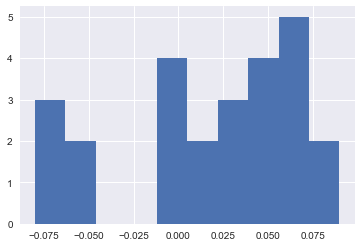

In [43]:
plt.hist(pnlseries)

In [44]:
#-----------------------------------------------------CTA Backtest Engine------------------------------------

In [45]:
def getNewMatrix(inputArray, t, m):
    newMatrix = []
    n = t-m+1
    for i in range(n):
        newdata = list(inputArray[i:m+i])
        newMatrix.append(newdata)
    #newMatrix = np.array(newMatrix).reshape(n,m)
    return np.array(newMatrix)

def recreateArray(newMatrix,t,m):
    ret = []
    n = t - m + 1
    for p in range(1, t+1):
        if p < m:
            alpha = p
        elif p > t-m+1:
            alpha = t-p+1
        else:
            alpha = m
        sigma = 0
        for j in range(1, m+1):
            i = p - j + 1
            if i > 0 and i < n+1:
                sigma += newMatrix[i-1][j-1]
        ret.append(sigma/alpha)
    return np.array(ret)

def getSVD(inputArray,t,m):
    #print 1
    inputmatrix = getNewMatrix(inputArray, t, m)
    u, s, v = np.linalg.svd(inputmatrix)
    eviNum = 1 if s[0]/s.sum() > 0.99 else 2
    sNew = np.zeros((eviNum, eviNum))
    np.fill_diagonal(sNew, s[:eviNum])
    matrixForts = np.dot(np.dot(u[:, :eviNum].reshape(u.shape[0], eviNum), sNew), v[:eviNum])
    #print matrixForts.shape
    newts = recreateArray(matrixForts, t, m)
    return newts

In [46]:
old_path = 'C:/Users/LZJF_02/Desktop/original_data/'
new_path = 'C:/Users/LZJF_02/Desktop/modified_data/'
filename = 'rb000_1min.csv'
#newname = 'j9000_1min_modi.csv'

In [191]:
startTime =  datetime.strptime('20160131', '%Y%m%d')
endTime = datetime.strptime('20170710', '%Y%m%d')

endTimeTrain =  datetime.strptime('20160530', '%Y%m%d')

startTimeVal = datetime.strptime('20160531', '%Y%m%d')
endTimeVal = datetime.strptime('20170710', '%Y%m%d')

In [48]:
# svd滤波参数
shapeNum = 30
svdShort = 7
svdLong = 20

In [49]:
# 期货合约相关参数
Leverage = 10
Slipage = 2
ContractSize = 10
IniCapital = 100000
FeeRate = 0.003
PriceTick = 1

In [200]:
data = pd.read_csv(old_path+filename,infer_datetime_format=True,header=None,names = ['Open', 'High', 'Low', 'Close','TotalVolume','OpenInterest'])
data.index = data.index.map(lambda x : pd.to_datetime(x))

In [201]:
data['OpenRatio'] = (data['OpenInterest'] - data['OpenInterest'].shift(1)) / data['TotalVolume']

In [211]:
data.loc[startTime:].describe()
data.loc[startTime:].quantile(0.85)

Open            3.257000e+03
High            3.260000e+03
Low             3.255000e+03
Close           3.257000e+03
TotalVolume     3.385600e+04
OpenInterest    4.255091e+06
OpenRatio       1.692873e-01
Name: 0.85, dtype: float64

In [203]:
data.describe()

,Open,High,Low,Close,TotalVolume,OpenInterest,OpenRatio
count,559424.000000,559424.000000,559424.000000,559424.000000,559424.000000,5.594240e+05,559423.000000
mean,3264.047300,3265.418556,3262.656613,3264.046666,11405.277618,2.374608e+06,-0.004413
std,959.305203,959.450165,959.158927,959.303869,14949.837188,1.251182e+06,0.225740
min,1617.000000,1618.000000,1616.000000,1617.000000,2.000000,8.376000e+03,-1.638679
25%,2407.000000,2408.000000,2405.000000,2407.000000,2482.000000,1.320980e+06,-0.132770
50%,3345.000000,3347.000000,3343.000000,3345.000000,6682.000000,2.372697e+06,0.003532
75%,4090.000000,4091.000000,4089.000000,4090.000000,14478.000000,3.422413e+06,0.133420
max,5186.000000,5187.000000,5182.000000,5185.000000,583962.000000,5.762684e+06,1.000000


In [154]:
# 默认空值
EMPTY_STRING = ''
EMPTY_UNICODE = u''
EMPTY_INT = 0
EMPTY_FLOAT = 0.0
class BarData(object):
    def __init__(self):
        self.open = EMPTY_FLOAT             # OHLC
        self.high = EMPTY_FLOAT
        self.low = EMPTY_FLOAT
        self.close = EMPTY_FLOAT
        
        self.date = EMPTY_STRING            # bar开始的时间，日期
        self.time = EMPTY_STRING            # 时间
        self.datetime = None                # python的datetime时间对象
        
        self.volume = EMPTY_INT             # 成交量
        self.openInterest = EMPTY_INT       # 持仓量 

In [221]:
c = data.loc[startTime:].groupby(pd.TimeGrouper(freq='5Min'))

In [227]:
nlarge = c['TotalVolume'].nlargest()

In [230]:
nlarge.iloc[:50]

2016-02-01 09:00:00  2016-02-01 09:00:00    79588
                     2016-02-01 09:04:00    46470
                     2016-02-01 09:01:00    40780
                     2016-02-01 09:02:00    32362
                     2016-02-01 09:03:00    29586
2016-02-01 09:05:00  2016-02-01 09:07:00    23836
                     2016-02-01 09:05:00    20500
                     2016-02-01 09:06:00    18102
                     2016-02-01 09:09:00    17718
                     2016-02-01 09:08:00     7430
2016-02-01 09:10:00  2016-02-01 09:10:00    20020
                     2016-02-01 09:11:00     9794
                     2016-02-01 09:13:00     8046
                     2016-02-01 09:12:00     3692
                     2016-02-01 09:14:00     2978
2016-02-01 09:15:00  2016-02-01 09:18:00     9958
                     2016-02-01 09:15:00     8546
                     2016-02-01 09:19:00     8278
                     2016-02-01 09:17:00     2234
                     2016-02-01 09:16:00     1582


In [206]:
# Rescale openratio by the rank of Volume corresponding trading minute. e.g.Weighing the Open ratio by the order of total volume.
a = c['TotalVolume'].rank()/15 * data['OpenRatio']  
dataslice = data.loc[a.index]
dataslice['ModiOR'] = a
dataslice.groupby(pd.TimeGrouper(freq='5Min'))['OpenRatio'].mean().dropna().describe()

count    111908.000000
mean         -0.004438
std           0.142197
min          -0.962924
25%          -0.080584
50%           0.005290
75%           0.083825
max           0.770955
Name: OpenRatio, dtype: float64

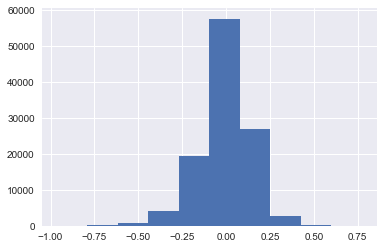

In [232]:
dataslice.groupby(pd.TimeGrouper(freq='5Min'))['OpenRatio'].mean().dropna().hist()

In [222]:
dataModi = dataslice.groupby(pd.TimeGrouper(freq='5Min'))['OpenRatio'].mean().dropna()
dataModi.quantile(0.85)

0.12698134357627083

In [51]:
def resample_data(data,period='5Min'):
    # 将一分钟线聚合为5分钟线
    databy5min = pd.DataFrame()
    groupgenerator = data.groupby(pd.TimeGrouper(freq=period))
    databy5min['Open'] = groupgenerator['Open'].first()
    databy5min['High'] = groupgenerator['High'].max()
    databy5min['Low'] = groupgenerator['Low'].min()
    databy5min['Close'] = groupgenerator['Close'].last()
    databy5min['TotalVolume'] = groupgenerator['TotalVolume'].sum()
    databy5min['OpenInterest'] = groupgenerator['OpenInterest'].last()
    databy5min.dropna(axis=0,inplace = True)
    return databy5min

In [52]:
dfResampled = resample_data(data)

In [97]:
dfResampled['OpenRatio'] = (dfResampled['OpenInterest'] - dfResampled['OpenInterest'].shift(1)) / dfResampled['TotalVolume']
dfResampled['WeightedOpenRatio'] = (dfResampled['OpenInterest'] - dfResampled['OpenInterest'].shift(1)) / np.sqrt(dfResampled['TotalVolume'])
dfResampled['pnl'] = dfResampled['Close'].pct_change()

In [54]:
dfResampled['OpenRatio'].median()

0.001997960241427162

In [98]:
dfResampled.describe()

,Open,High,Low,Close,TotalVolume,OpenInterest,OpenRatio,pnl,WeightedOpenRatio
count,111908.000000,111908.000000,111908.000000,111908.000000,1.119080e+05,1.119080e+05,111907.000000,1.119070e+05,111907.000000
mean,3264.037602,3267.086652,3260.927905,3264.036485,5.701457e+04,2.374326e+06,-0.007945,9.798373e-07,-0.223361
std,959.258933,959.640498,958.852532,959.252726,6.382081e+04,1.251301e+06,0.145843,1.721808e-03,27.348419
min,1618.000000,1620.000000,1616.000000,1618.000000,1.200000e+01,1.764800e+04,-0.977303,-4.610082e-02,-233.119318
25%,2407.000000,2409.000000,2404.000000,2407.000000,1.600550e+04,1.320762e+06,-0.084496,-5.817336e-04,-14.247634
50%,3345.000000,3350.000000,3340.000000,3345.000000,3.781100e+04,2.372463e+06,0.001998,0.000000e+00,0.371196
75%,4090.000000,4093.000000,4087.000000,4090.000000,7.458650e+04,3.422211e+06,0.080976,5.929440e-04,15.233727
max,5183.000000,5187.000000,5178.000000,5184.000000,1.510978e+06,5.762308e+06,0.822755,5.791506e-02,239.672039


In [104]:
dfResampled['WeightedOpenRatio'].quantile(0.996)

79.3262214833311

In [55]:
dfResampled[dfResampled['OpenRatio'] > 0].mean()

Open            3.274787e+03
High            3.277965e+03
Low             3.271588e+03
Close           3.274822e+03
TotalVolume     5.961340e+04
OpenInterest    2.390968e+06
OpenRatio       9.937904e-02
pnl             6.413913e-06
dtype: float64

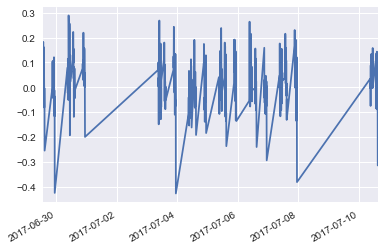

In [56]:
dfResampled['OpenRatio'].tail(500).plot()

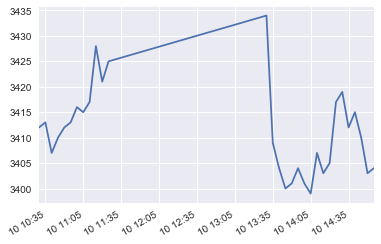

In [57]:
dfResampled['Close'].tail(30).plot()

In [58]:
dfResampled[['pnl','OpenRatio']].tail(50)

,pnl,OpenRatio
2017-07-07 22:35:00,0.002065,0.037576
2017-07-07 22:40:00,-0.000589,0.120912
2017-07-07 22:45:00,-0.000295,0.013627
2017-07-07 22:50:00,-0.000884,-0.170454
2017-07-07 22:55:00,-0.001474,-0.380509
2017-07-10 09:00:00,0.002658,0.035064
2017-07-10 09:05:00,0.000000,-0.003065
2017-07-10 09:10:00,-0.000589,0.016625
2017-07-10 09:15:00,-0.000589,-0.074482
2017-07-10 09:20:00,0.000000,0.088360


In [106]:
len(dfResampled[dfResampled['OpenRatio'] < 0.15]) / len(dfResampled)

0.8898112735461272

In [60]:
len(dfResampled[dfResampled['OpenRatio'] < 0]) / len(dfResampled)

0.49335168173857097

In [61]:
np.sqrt(0.33*225/5)

3.8535697735995385

In [62]:
datatrain = dfResampled.loc[startTime:endTimeTrain]

In [63]:
datatrain['EMAOpenRatio'] = talib.EMA(datatrain['OpenRatio'].values, timeperiod=4)

datatrain['EMAOpenRatio'].describe()

c:\python27\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


count    46622.000000
mean        -0.015195
std          0.093781
min         -0.780899
25%         -0.058775
50%         -0.006390
75%          0.040910
max          0.351774
Name: EMAOpenRatio, dtype: float64

In [64]:
datatrain['OpenRatio'].describe()

count    46625.000000
mean        -0.015197
std          0.144084
min         -0.977303
25%         -0.085224
50%         -0.002914
75%          0.071102
max          0.635389
Name: OpenRatio, dtype: float64

In [65]:
datatrain['EMAOpenRatio'].quantile(0.92)

0.09533317864700071

In [66]:
datatrain['OpenRatio'].quantile(0.9)

0.1446418082008238

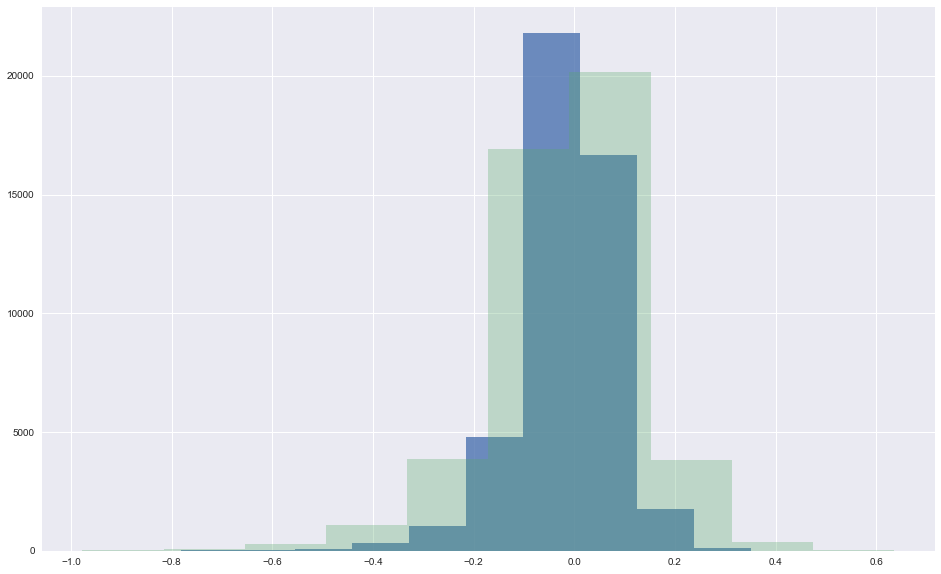

In [67]:
# show size distribution(quantile plot)
fig = plt.figure(figsize=(16,10))
# Add a subplot
ax = fig.add_subplot(111)
datatrain['EMAOpenRatio'].hist(alpha =0.8)
datatrain['OpenRatio'].hist(alpha = 0.3)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=25)

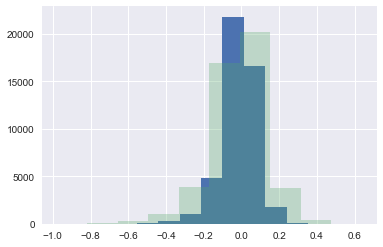

In [68]:
datatrain['EMAOpenRatio'].hist()
datatrain['OpenRatio'].hist(alpha = 0.3)

In [69]:
datatrain['OpenRatio'].describe()

count    46625.000000
mean        -0.015197
std          0.144084
min         -0.977303
25%         -0.085224
50%         -0.002914
75%          0.071102
max          0.635389
Name: OpenRatio, dtype: float64

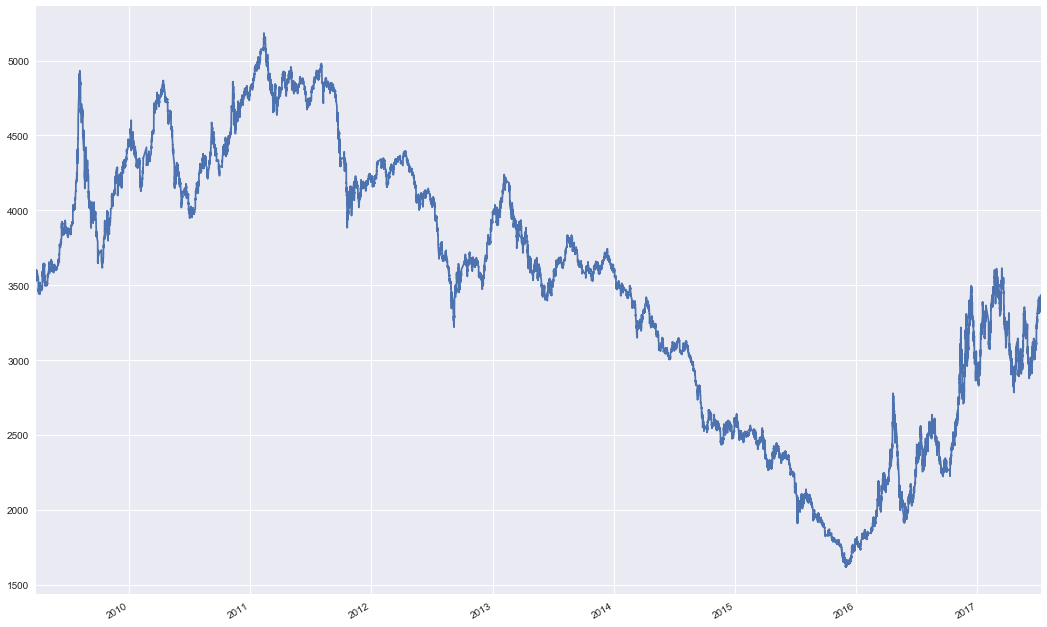

In [70]:
dfResampled['Close'].plot(figsize=(18,12))

In [71]:
shapeNum = 20

In [72]:
svdindicator = getSVD(datatrain['Close'].values[-shapeNum:], shapeNum, svdShort)

In [73]:
svdindicator1 = getSVD(datatrain['Close'].values[-shapeNum:], shapeNum, svdLong)
svdindicator1

array([ 2021.        ,  1012.        ,   671.        ,   504.25      ,
         403.2       ,   335.        ,   288.14285714,   252.625     ,
         224.88888889,   202.1       ,   184.45454545,   168.75      ,
         155.92307692,   145.14285714,   135.46666667,   126.375     ,
         118.88235294,   112.5       ,   106.63157895,  2027.        ])

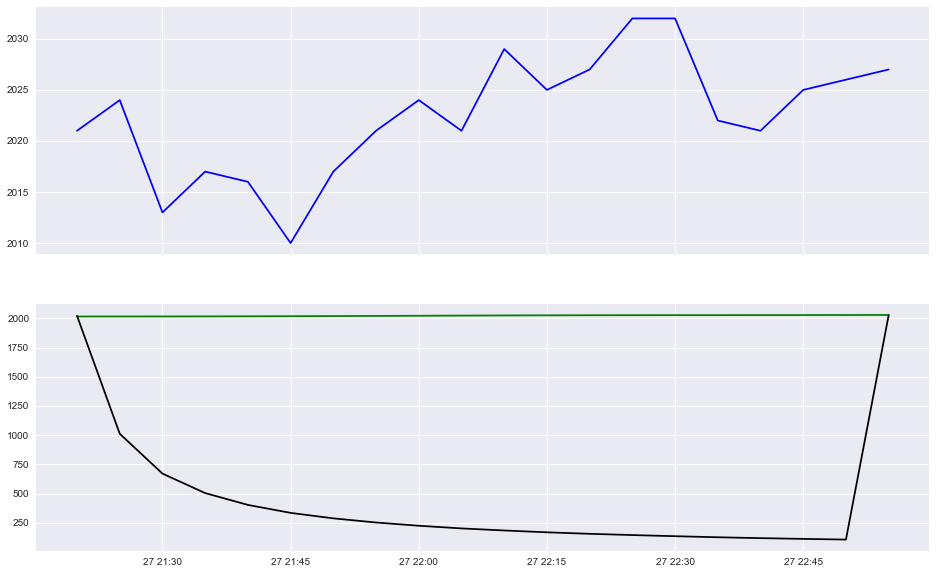

In [74]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True,figsize=(16,10))
ax1.plot(datatrain.index[-shapeNum:],datatrain['Close'].values[-shapeNum:],'blue',label='Close')
ax2.plot(datatrain.index[-shapeNum:],svdindicator,'green',)
ax2.plot(datatrain.index[-shapeNum:],svdindicator1,'black')
#ax1.title('SVD')

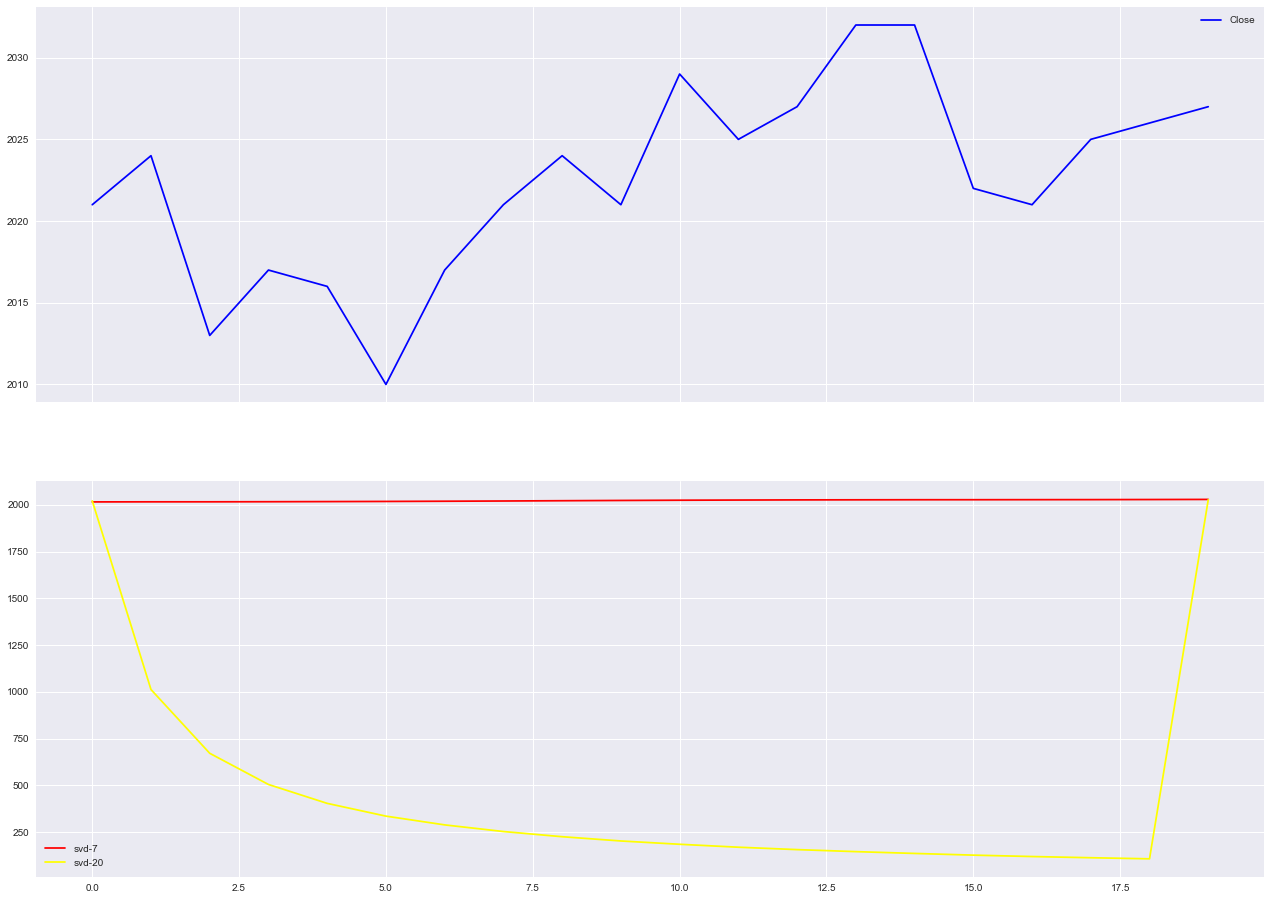

In [75]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True,figsize=(22,16))
ax1.plot(datatrain['Close'].values[-shapeNum:],'blue',label='Close')
ax2.plot(svdindicator,'red',label='svd-'+str(svdShort))
ax2.plot(svdindicator1,'yellow',label='svd-'+str(svdLong))
#ax1.title('SVD')
ax1.legend()
ax2.legend()

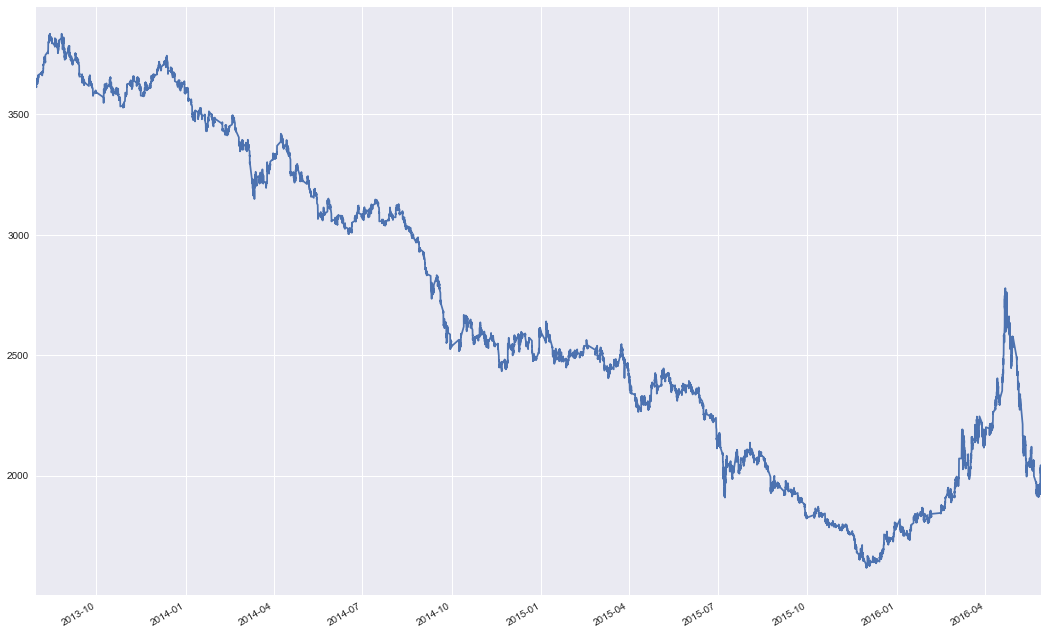

In [76]:
datatrain['Close'].plot(figsize=(18,12))

In [77]:
#kvol.median()

In [78]:
kvol = (datatrain['Close'] - datatrain['Close'].shift(1)).rolling(min_periods=60,window=60,center=False).std()

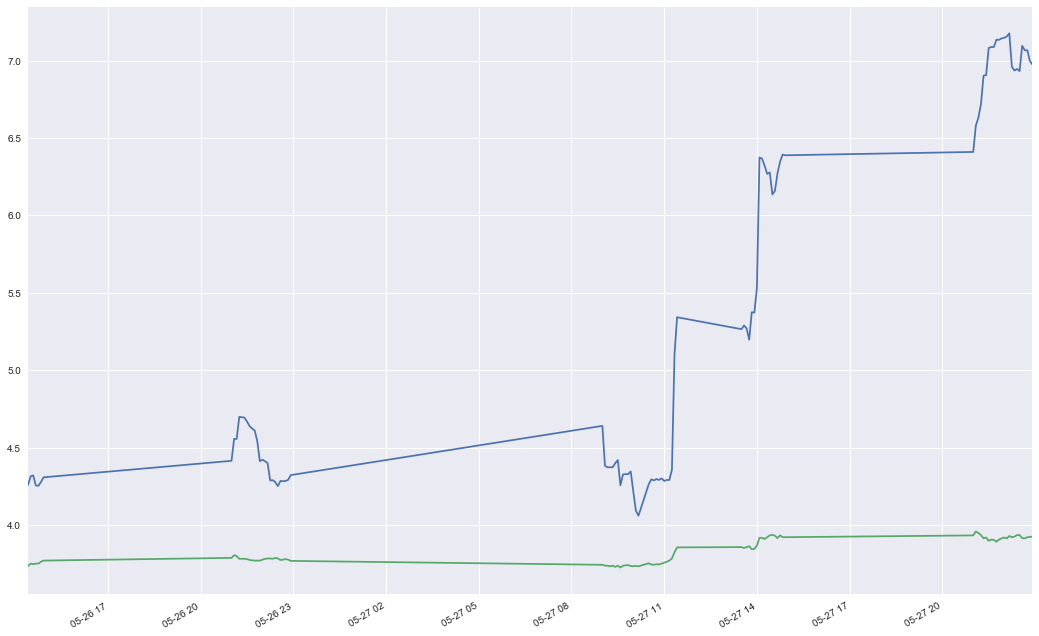

In [79]:
kvol.iloc[-100:].plot(figsize=(18,12))
((7*datatrain['Close']/datatrain['Close'].iloc[0]).iloc[-100:]).plot(sharex=True)

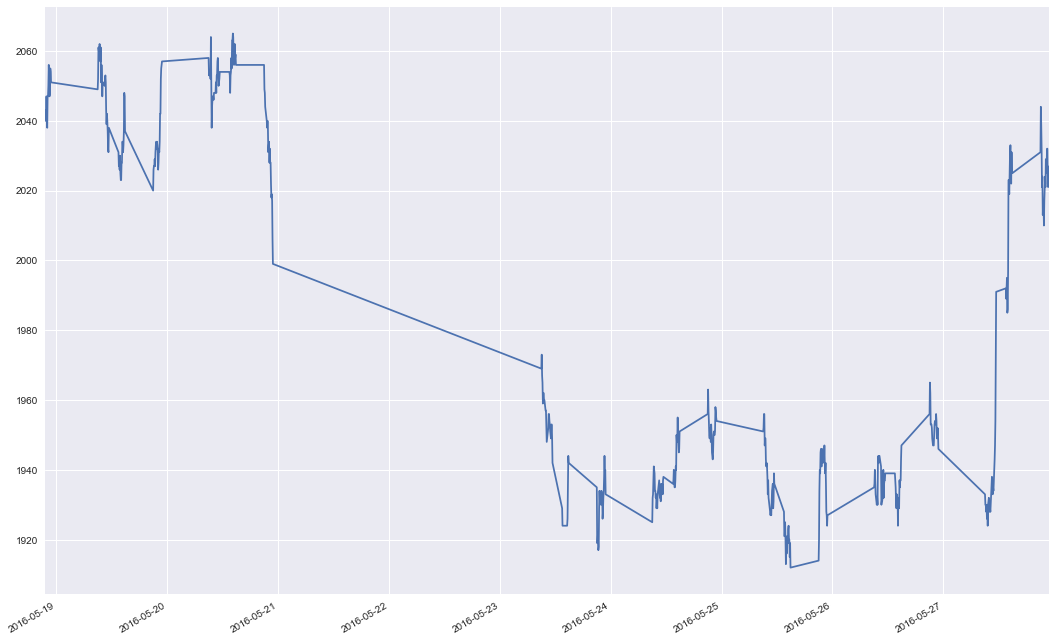

In [80]:
datatrain['Close'].iloc[-500:].plot(figsize=(18,12))

In [81]:
datatrain['Impact'] = (datatrain['Close'] - datatrain['Open']) / datatrain['TotalVolume']   

c:\python27\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


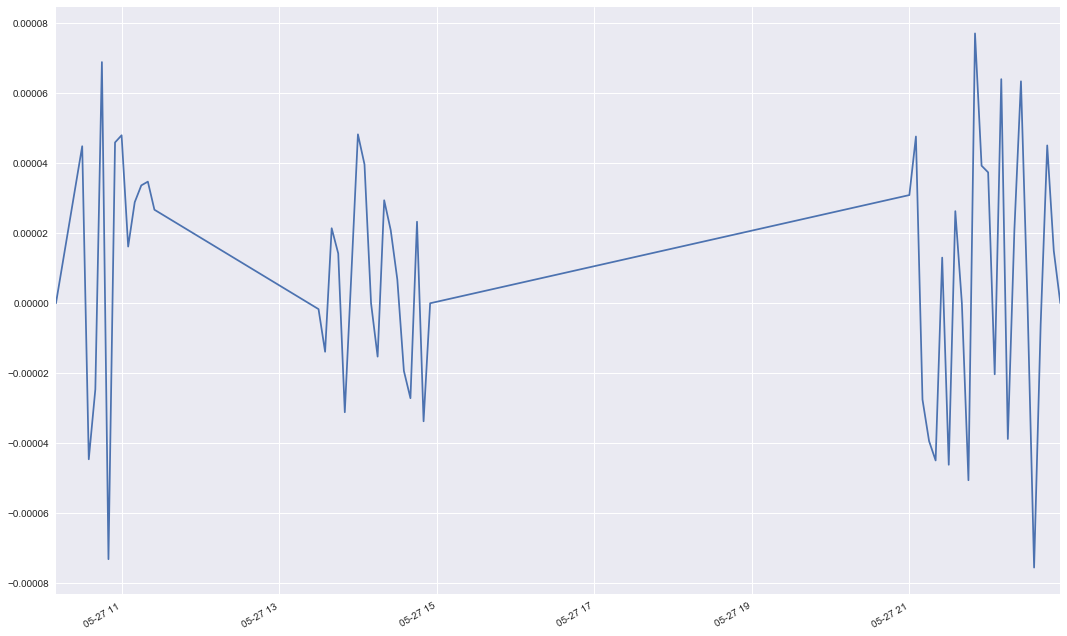

In [82]:
datatrain['Impact'].iloc[-55:].plot(figsize=(18,12))

In [83]:
datatrain['TotalVolume'].iloc[-55:].mean()

205968.8

In [84]:
datatrain[datatrain['Impact']>0]

,Open,High,Low,Close,TotalVolume,OpenInterest,OpenRatio,pnl,EMAOpenRatio,Impact
2013-07-31 09:00:00,3608.0,3616.0,3603.0,3614.0,130914.0,1723626.0,0.149564,-0.001933,NaN,0.000046
2013-07-31 09:05:00,3614.0,3616.0,3612.0,3616.0,57000.0,1721182.0,-0.042877,0.000553,NaN,0.000035
2013-07-31 09:15:00,3613.0,3615.0,3612.0,3614.0,27446.0,1739644.0,0.050645,0.000277,0.117878,0.000036
2013-07-31 09:20:00,3613.0,3615.0,3613.0,3615.0,11754.0,1740136.0,0.041858,0.000277,0.087470,0.000170
2013-07-31 09:25:00,3615.0,3623.0,3614.0,3622.0,73144.0,1738994.0,-0.015613,0.001936,0.046237,0.000096
2013-07-31 09:30:00,3621.0,3629.0,3621.0,3623.0,71236.0,1743576.0,0.064321,0.000276,0.053471,0.000028
2013-07-31 09:40:00,3622.0,3624.0,3621.0,3623.0,22882.0,1741418.0,-0.172275,0.000276,-0.034523,0.000044
2013-07-31 09:45:00,3623.0,3625.0,3621.0,3624.0,20456.0,1742772.0,0.066191,0.000276,0.005763,0.000049
2013-07-31 09:55:00,3623.0,3627.0,3623.0,3627.0,23968.0,1742816.0,0.062834,0.001104,-0.009634,0.000167
2013-07-31 10:30:00,3622.0,3624.0,3622.0,3624.0,9482.0,1742346.0,0.075722,0.000276,-0.026348,0.000211


In [92]:
filtered = datatrain[(datatrain['TotalVolume']<datatrain['TotalVolume'].quantile(0.2)) & (datatrain['Impact']>((datatrain[datatrain['Impact']>0]['Impact']).quantile(0.7)))]

In [93]:
filtered

,Open,High,Low,Close,TotalVolume,OpenInterest,OpenRatio,pnl,EMAOpenRatio,Impact
2013-07-31 09:20:00,3613.0,3615.0,3613.0,3615.0,11754.0,1740136.0,0.041858,0.000277,0.087470,0.000170
2013-07-31 10:30:00,3622.0,3624.0,3622.0,3624.0,9482.0,1742346.0,0.075722,0.000276,-0.026348,0.000211
2013-07-31 13:55:00,3631.0,3632.0,3629.0,3632.0,13144.0,1730738.0,-0.091144,0.000275,-0.088130,0.000076
2013-07-31 14:25:00,3630.0,3632.0,3629.0,3631.0,12642.0,1731968.0,-0.189843,0.000275,-0.054103,0.000079
2013-08-01 10:40:00,3642.0,3644.0,3642.0,3643.0,11214.0,1684940.0,-0.115570,0.000275,0.021561,0.000089
2013-08-01 10:50:00,3641.0,3642.0,3640.0,3642.0,12904.0,1688124.0,0.017979,0.000275,0.064602,0.000077
2013-08-01 10:55:00,3642.0,3643.0,3641.0,3643.0,9560.0,1688352.0,0.023849,0.000275,0.048301,0.000105
2013-08-01 11:15:00,3641.0,3643.0,3641.0,3643.0,7944.0,1690216.0,0.560675,0.000549,0.192704,0.000252
2013-08-01 14:15:00,3630.0,3631.0,3629.0,3631.0,12220.0,1730974.0,0.253028,0.000275,0.172893,0.000082
2013-08-01 14:20:00,3631.0,3633.0,3630.0,3632.0,13602.0,1731928.0,0.070137,0.000275,0.131791,0.000074


In [87]:
datatrain.iloc[:2]

,Open,High,Low,Close,TotalVolume,OpenInterest,OpenRatio,pnl,EMAOpenRatio,Impact
2013-07-31 09:00:00,3608.0,3616.0,3603.0,3614.0,130914.0,1723626.0,0.149564,-0.001933,NaN,0.000046
2013-07-31 09:05:00,3614.0,3616.0,3612.0,3616.0,57000.0,1721182.0,-0.042877,0.000553,NaN,0.000035


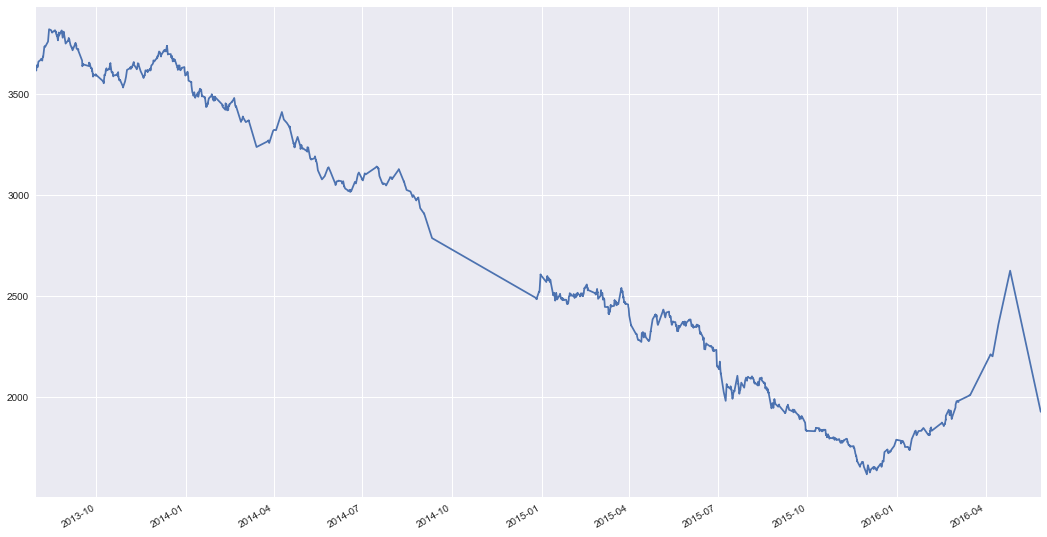

In [88]:
filtered['Close'].plot(figsize=(18,10))

In [89]:
trackBackPeriod = 50
code = 'rb000' 
initialNum = 100

In [90]:
futurebuyList = []
for i in range(initialNum,len(datatrain)-1):
    svdshortArray = getSVD(datatrain['Close'].values[i+1-trackBackPeriod:i+1], trackBackPeriod, svdShort)
    svdlongArray = getSVD(datatrain['Close'].values[i+1-trackBackPeriod:i+1], trackBackPeriod, svdLong)
    if svdshortArray[-2] < svdlongArray[-2] and svdshortArray[-1] > svdlongArray[-1]:
        dfslice = datatrain.iloc[i+1]
        amount = 1
        price = dfslice['Open']
        cost = price * amount
        direction = 1
        futurebuyList.append([dfslice.name,code,price,amount,cost,direction])

In [91]:
futurebuyList

[[Timestamp('2013-08-02 14:40:00'), 'rb000', 3659.0, 1, 3659.0, 1],
 [Timestamp('2013-08-06 11:25:00'), 'rb000', 3667.0, 1, 3667.0, 1],
 [Timestamp('2013-08-13 10:40:00'), 'rb000', 3820.0, 1, 3820.0, 1],
 [Timestamp('2013-08-14 13:45:00'), 'rb000', 3824.0, 1, 3824.0, 1],
 [Timestamp('2013-08-19 09:55:00'), 'rb000', 3814.0, 1, 3814.0, 1],
 [Timestamp('2013-08-21 09:35:00'), 'rb000', 3794.0, 1, 3794.0, 1],
 [Timestamp('2013-08-21 10:40:00'), 'rb000', 3792.0, 1, 3792.0, 1],
 [Timestamp('2013-08-22 10:00:00'), 'rb000', 3784.0, 1, 3784.0, 1],
 [Timestamp('2013-08-26 14:10:00'), 'rb000', 3804.0, 1, 3804.0, 1],
 [Timestamp('2013-08-27 10:30:00'), 'rb000', 3779.0, 1, 3779.0, 1],
 [Timestamp('2013-08-28 11:20:00'), 'rb000', 3807.0, 1, 3807.0, 1],
 [Timestamp('2013-09-04 09:20:00'), 'rb000', 3738.0, 1, 3738.0, 1],
 [Timestamp('2013-09-04 11:00:00'), 'rb000', 3743.0, 1, 3743.0, 1],
 [Timestamp('2013-09-05 11:00:00'), 'rb000', 3732.0, 1, 3732.0, 1],
 [Timestamp('2013-09-09 09:10:00'), 'rb000', 373